# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


Формируем набор признаков и целевую переменную

In [4]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [5]:
Y = data['affair']

In [6]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [8]:
model.fit(X_train, Y_train)

LogisticRegression()

### ROC

### Используем готовые библиотеки

In [21]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [22]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [25]:
# for line in zip( fpr, tpr, thres ):
#     print( line )

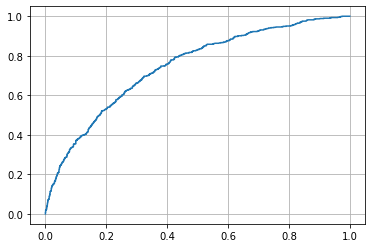

In [24]:
plt.plot( fpr, tpr )
plt.grid()

### Посчитаем сами

<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value encountered in longlong_scalars
  precision.append(tp / (tp + fp))
<ipython-input-97-39c4e8931fa6>:21: RuntimeWarning: invalid value enc

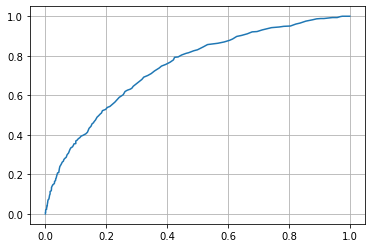

In [97]:
def roc_curve(y_true, y_prob, thresholds):    # первая функция

    fpr_ = []
    tpr_ = []
    precision = []
    recall = []

    for threshold in thresholds:

        y_pred = np.where(y_prob >= threshold, 1, 0)

        fp = np.sum((y_pred == 1) & (y_true == 0))
        tp = np.sum((y_pred == 1) & (y_true == 1))

        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))

        fpr_.append(fp / (fp + tn))
        tpr_.append(tp / (tp + fn))
        
        precision.append(tp / (tp + fp))
        recall.append(tp / (tp + fn))
        
    return [fpr_, tpr_, precision, recall]

predictions = model.predict_proba( X_test )
thresholds = np.linspace(1, 0, 200)
y = roc_curve(Y_test, predictions[:, 1], thresholds)

plt.plot(y[0], y[1])
plt.grid()



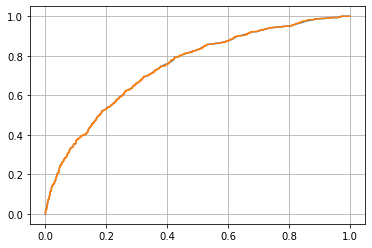

In [98]:
plt.plot(y[0], y[1], fpr, tpr)
plt.grid()

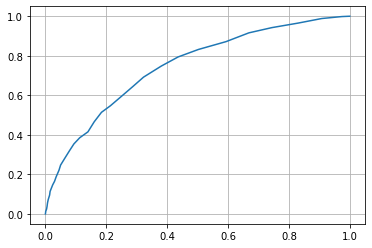

In [119]:
def calc_roc(a, Y_test, thresholds):    # вторая функция
    
    tpr_ = [] # True positive rate
    fpr_ = [] # False positive rate 
    precision = []
    recall = []
    
    for threshold in thresholds:
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative
                
        for predicted_prob, actual in zip( a, Y_test ):
            
            if predicted_prob >= threshold:
                predicted = 1
            else:
                predicted = 0
            
            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
            
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
                        
                 
        tpr_.append(tp / (tp + fn))
        fpr_.append(fp / (fp + tn))
        
#         precision.append(tp / (tp + fp))
#         recall.append(tp / (tp + fn))
        
    return [fpr_, tpr_, precision, recall]
        

predictions = model.predict_proba( X_test )
thresholds = np.linspace(1, 0, 40)
z = calc_roc(predictions[:, 1], Y_test, thresholds)
plt.plot(z[0], z[1])
plt.grid()

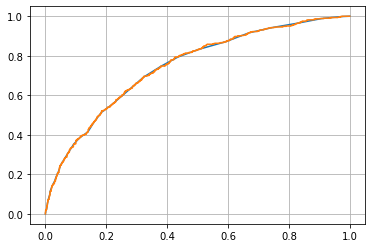

In [100]:
plt.plot(z[0], z[1], fpr, tpr)
plt.grid()

**Посчитаем площадь под ROC-кривой**

In [101]:
from sklearn.metrics import auc

In [102]:
auc( fpr, tpr )

0.7451616533130363

In [103]:
auc( y[0], y[1])

0.7451174011057994

In [104]:
auc( z[0], z[1] )

0.7449644149036377

In [105]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

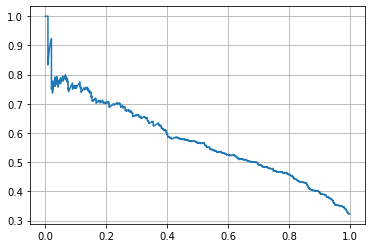

In [106]:
plt.plot(re, pr)
plt.grid()

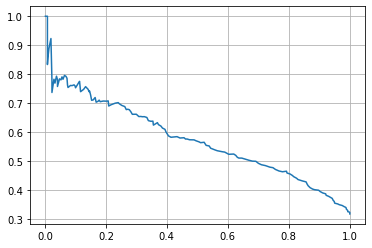

In [107]:
plt.plot(y[3], y[2])
plt.grid()